## EDA

In [33]:
import numpy as np # calculations.
import seaborn as sns # visualisation.
import matplotlib.pyplot as plt # visualisation.
import pandas as pd # dataframes and data analysis.

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier as DT

In [34]:
df = pd.read_csv("Swan_Churn.csv")

In [35]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [36]:
df.shape

(7043, 31)

In [37]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [38]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [39]:
df['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [40]:
df['Phone Service'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
df['Multiple Lines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

Multiple Lines, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies all have the same three options

array(['No', 'Yes', 'No phone service'], dtype=object)

In [42]:
df['State'].unique()

array(['California'], dtype=object)

In [43]:
df['Country'].unique()

array(['United States'], dtype=object)

Both Country and State have only one value

Lat Long is just a column combination of Lat and Long, multicolinearity

In [44]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [45]:
df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [46]:
df['Churn Label'].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
df['Churn Value'].unique()

array([1, 0], dtype=int64)

Both Churn Label and Churn Value have the same data once we OHE, multicolinearity

In [48]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

empty_values_per_column = (df == '').sum()

print("Empty values per column:")
print(empty_values_per_column)

Empty values per column:
CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Reason          0
dtype: int64


Tenure Months that have 0 value we are filling the Total charges as 0 for them

In [49]:
df.loc[df['Tenure Months'] == 0, 'Total Charges'] = 0

In [50]:
df[df['Tenure Months'] == 0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No,0,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No,0,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Yes,Yes,Two year,No,Mailed check,80.85,0,No,0,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No,0,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Yes,No,Two year,No,Credit card (automatic),56.05,0,No,0,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No,0,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No,0,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No,0,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No,0,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Yes,No,Two year,No,Mailed check,73.35,0,No,0,NaN


In [51]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

## Visualisations

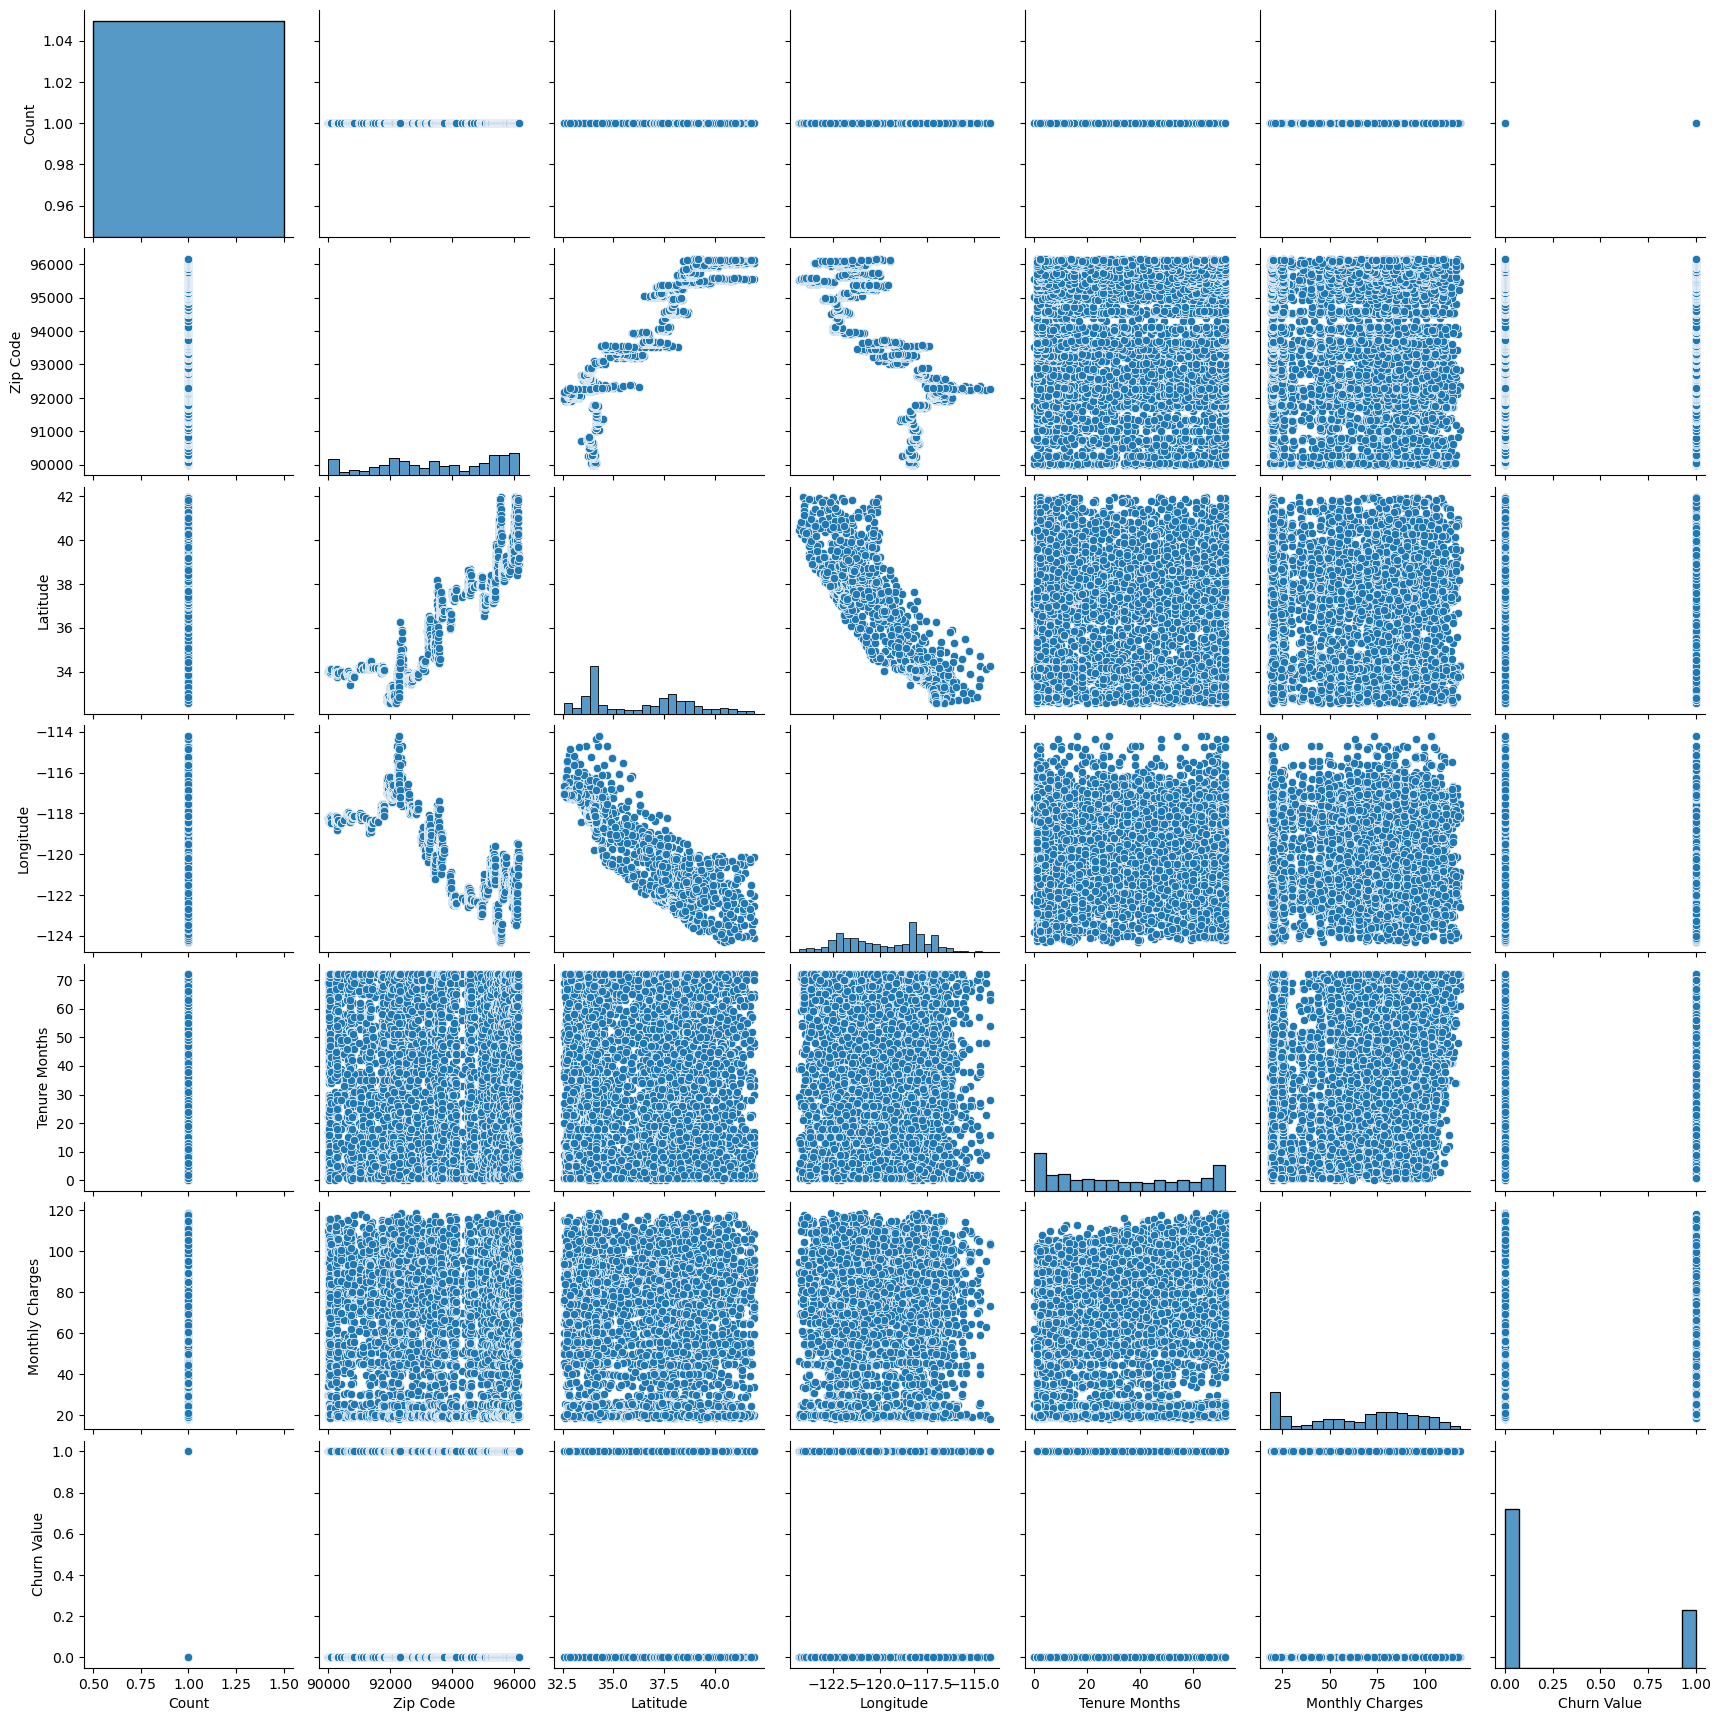

In [52]:
numeric_df = df.select_dtypes(include=['number'])

sns.pairplot(numeric_df)
plt.show()

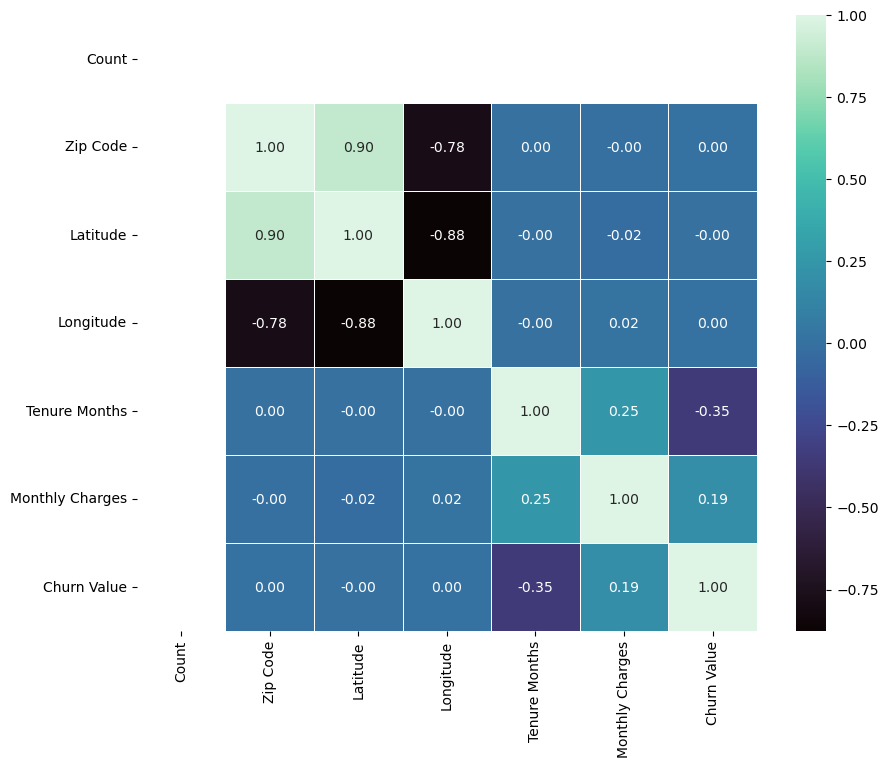

In [53]:
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt='.2f', linewidths=0.5)
plt.show()

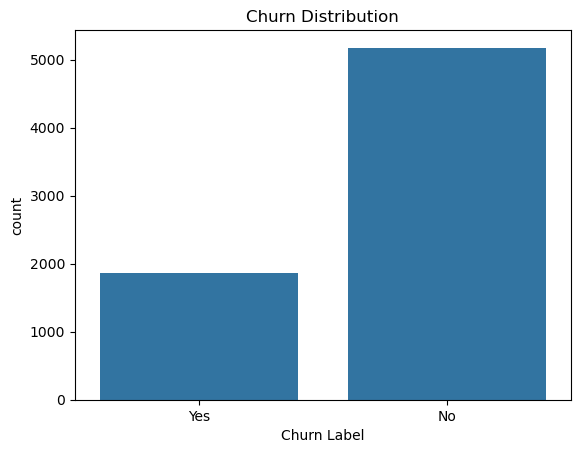

In [54]:
sns.countplot(x='Churn Label', data=df)
plt.title('Churn Distribution')
plt.show()

C:\Users\js208\AppData\Local\Temp\ipykernel_8720\2053698241.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='mako')


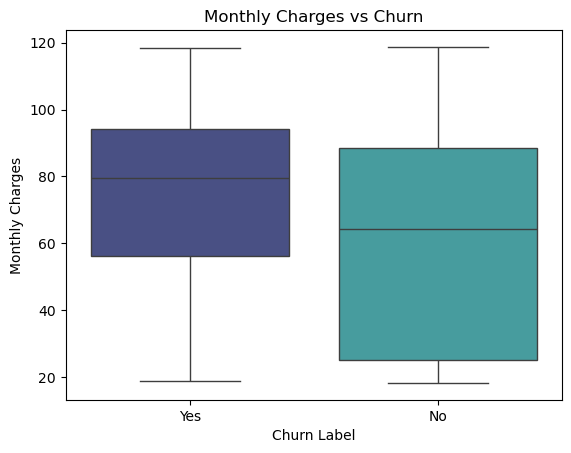

C:\Users\js208\AppData\Local\Temp\ipykernel_8720\2053698241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Tenure Months', data=df, palette='mako')


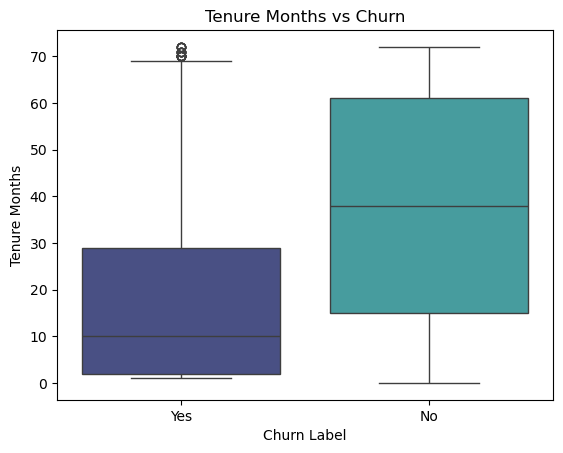

In [55]:
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='mako')
plt.title('Monthly Charges vs Churn')
plt.show()

sns.boxplot(x='Churn Label', y='Tenure Months', data=df, palette='mako')
plt.title('Tenure Months vs Churn')
plt.show()

In [56]:
feature_cols = [
    'Latitude',
    'Longitude',
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Tenure Months',
    'Phone Service',
    'Multiple Lines', 
    'Internet Service', 
    'Online Security',
    'Online Backup', 
    'Device Protection', 
    'Tech Support', 
    'Streaming TV',   
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Monthly Charges',
    'Total Charges',
    'Churn Value'
]

def visual_engineering(df):
    df = df[feature_cols].copy()
    df['Gender'] = df['Gender'].map({'Female':0, 'Male':1, 0:0, 1:1})
    df['Senior Citizen'] = df['Senior Citizen'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Partner'] = df['Partner'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Dependents'] = df['Dependents'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Phone Service'] = df['Phone Service'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Multiple Lines'] = df['Multiple Lines'].map({'No':0, 'Yes':1, 'No phone service':2, 0:0, 1:1, 2:2})
    df['Internet Service'] = df['Internet Service'].map({'DSL':1, 'Fiber optic':2, 'No':0, 0:0, 1:1, 2:2})
    
    df['Online Security'] = df['Online Security'].map({'No':0, 'Yes':1, 'No internet service':2, 0:0, 1:1, 2:2})
    df['Online Backup'] = df['Online Backup'].map({'No':0, 'Yes':1, 'No internet service':2, 0:0, 1:1, 2:2})
    df['Device Protection'] = df['Device Protection'].map({'No':0, 'Yes':1, 'No internet service':2, 0:0, 1:1, 2:2})
    df['Tech Support'] = df['Tech Support'].map({'No':0, 'Yes':1, 'No internet service':2, 0:0, 1:1, 2:2})
    df['Streaming TV'] = df['Streaming TV'].map({'No':0, 'Yes':1, 'No internet service':2, 0:0, 1:1, 2:2})
    df['Streaming Movies'] = df['Streaming Movies'].map({'No':0, 'Yes':1, 'No internet service':2, 0:0, 1:1, 2:2})
    df['Contract'] = df['Contract'].map({'Month-to-month':0, 'Two year':2, 'One year':1, 0:0, 1:1, 2:2})
    df['Paperless Billing'] = df['Paperless Billing'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Payment Method'] = df['Dependents'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df.loc[df['Tenure Months'] == 0, 'Total Charges'] = 0
    df['Total Charges'] = df['Total Charges'].astype(float)
        
    return df

#df_fe = feature_engineering(df)
df_visual = visual_engineering(df)
df_visual.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,33.964131,-118.272783,1,0,0,0,2,1,0,1,...,0,0,0,0,0,1,0,53.85,108.15,1
1,34.059281,-118.307420,0,0,0,1,2,1,0,2,...,0,0,0,0,0,1,1,70.70,151.65,1
2,34.048013,-118.293953,0,0,0,1,8,1,1,2,...,1,0,1,1,0,1,1,99.65,820.50,1
3,34.062125,-118.315709,0,0,1,1,28,1,1,2,...,1,1,1,1,0,1,1,104.80,3046.05,1
4,34.039224,-118.266293,1,0,0,1,49,1,1,2,...,1,0,1,1,0,1,1,103.70,5036.30,1


In [57]:
# Filter churners and non-churners
churners = df[df['Churn Label'] == 'Yes']  # Assuming 'Yes' indicates churned
non_churners = df[df['Churn Label'] == 'No']  # Assuming 'No' indicates non-churned


In [58]:
# Count gender distribution for churners
gender_distribution_churners = churners['Gender'].value_counts()
gender_distribution_non_churners = non_churners['Gender'].value_counts()

print("Gender Distribution for Churners:")
print(gender_distribution_churners)

print("\nGender Distribution for Non-Churners:")
print(gender_distribution_non_churners)


Gender Distribution for Churners:
Gender
Female    939
Male      930
Name: count, dtype: int64

Gender Distribution for Non-Churners:
Gender
Male      2625
Female    2549
Name: count, dtype: int64


In [59]:
# Churners with and without dependents
dependents_churners = churners['Dependents'].value_counts()
dependents_non_churners = non_churners['Dependents'].value_counts()

print("Dependents Distribution for Churners:")
print(dependents_churners)

print("\nDependents Distribution for Non-Churners:")
print(dependents_non_churners)


Dependents Distribution for Churners:
Dependents
No     1763
Yes     106
Name: count, dtype: int64

Dependents Distribution for Non-Churners:
Dependents
No     3653
Yes    1521
Name: count, dtype: int64


In [61]:
feature_cols = list(df_fe.columns)
#feature_cols = ['Tenure Months', 'Internet_Service_Fiber optic', 'Dependents', 'Payment_Method_Electronic check', 'Contract_One year', 'Device_Protection_No internet service', 'Total Charges', 'Online_Backup_No internet service', 'Online_Security_No internet service', 'Internet_Service_No', 'Streaming_Movies_No internet service', 'Tech_Support_No internet service', 'Streaming_TV_No internet service', 'Online_Security_Yes', 'Paperless Billing', 'Streaming_Movies_Yes', 'Tech_Support_Yes', 'Multiple_Lines_Yes', 'Streaming_TV_Yes', 'Contract_Two year', 'Partner']
feature_cols.remove('Churn Value')

X = df_fe[feature_cols]
y = df_fe['Churn Value']

NameError: name 'df_fe' is not defined

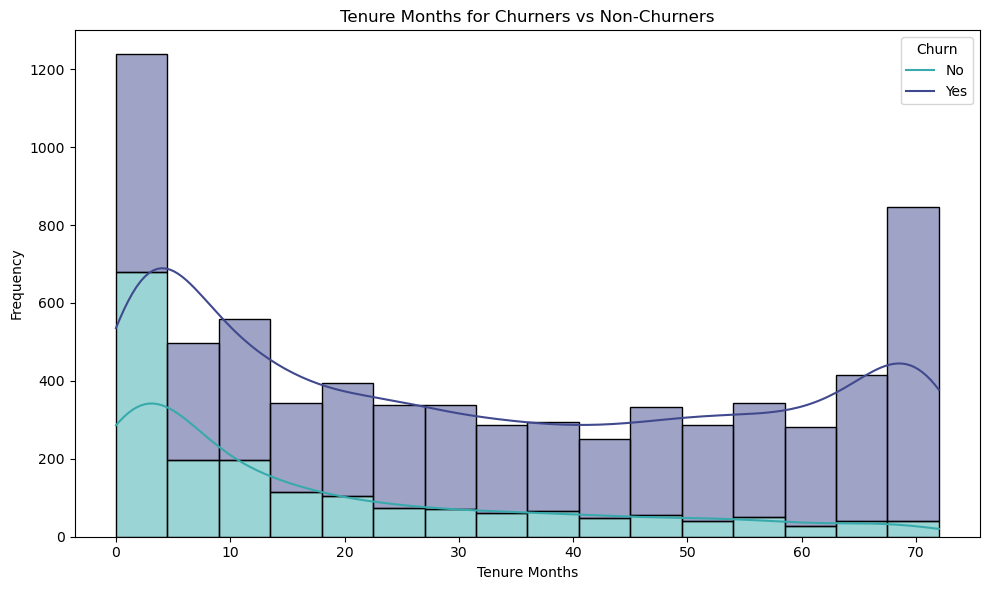

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_visual, x='Tenure Months', hue='Churn Value', multiple='stack', kde=True, palette='mako')


plt.title('Tenure Months for Churners vs Non-Churners')
plt.xlabel('Tenure Months')
plt.ylabel('Frequency')


plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


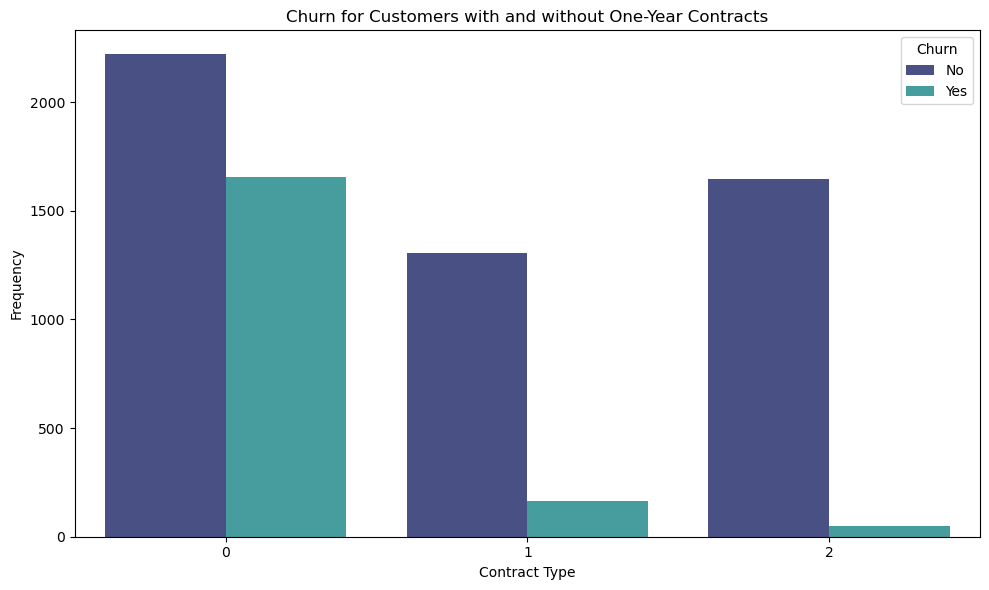

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_visual, x='Contract', hue='Churn Value', palette='mako')


plt.title('Churn for Customers with and without One-Year Contracts')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')

plt.legend(title='Churn', labels=['No', 'Yes'])


plt.tight_layout()


plt.show()
